In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


<AxesSubplot: xlabel='loan_status', ylabel='count'>

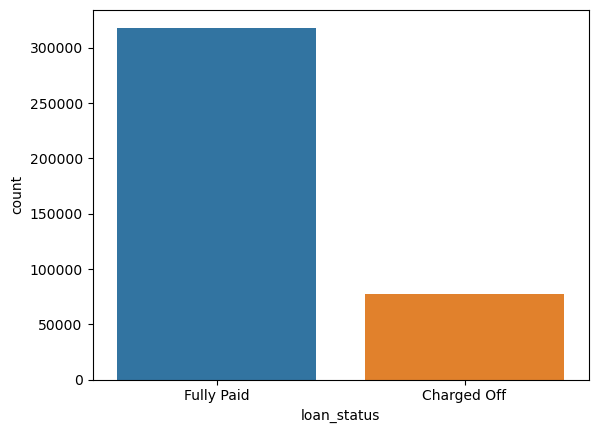

In [4]:
#see that there is a lot more fully paid than charged off
sns.countplot(x = "loan_status" , data = data)

/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_7497/599981549.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["loan_amnt"] , kde = True , bins = 20)


<AxesSubplot: xlabel='loan_amnt', ylabel='Density'>

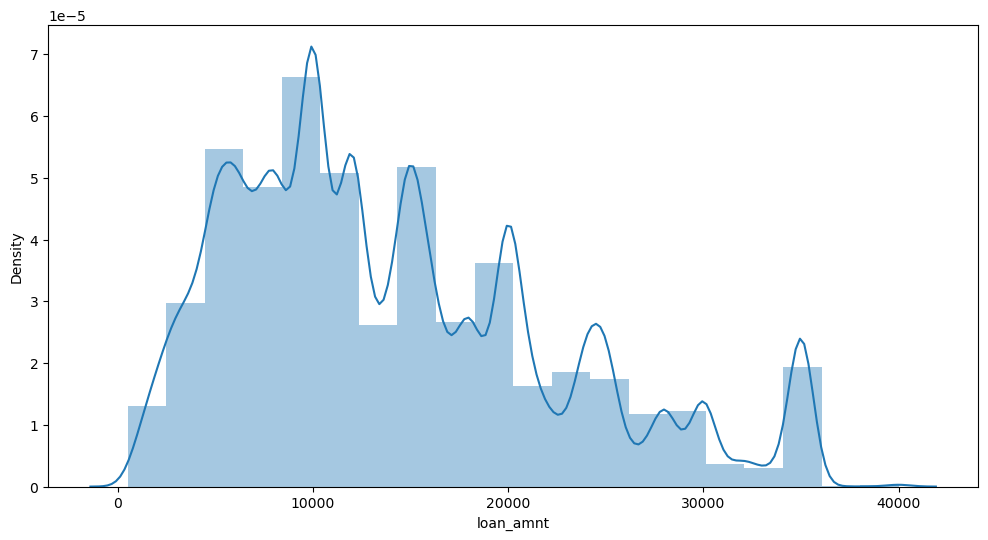

In [5]:
#see here that most loans are around $8000-20000
plt.figure(figsize = (12,6))
sns.distplot(data["loan_amnt"] , kde = True , bins = 20)

/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_7497/595388401.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated_data = data.corr()


(10.0, 0.0)

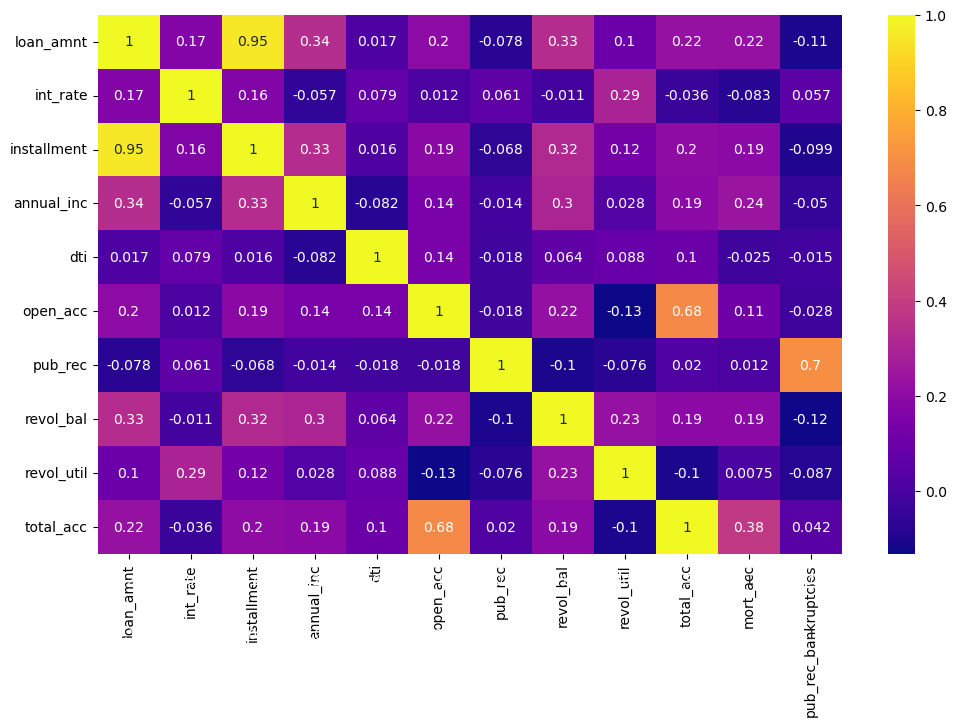

In [6]:
#creating a heatmap to see how much variables correlate with one another, see that loan_amount and installment highly correlate
correlated_data = data.corr()
plt.figure(figsize = (12,7))
sns.heatmap(correlated_data , cmap = "plasma" , annot = True)
plt.ylim(10,0)

<AxesSubplot: xlabel='loan_amnt', ylabel='installment'>

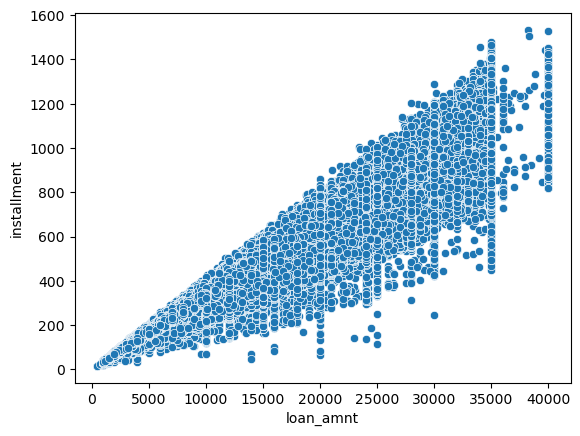

In [7]:
#see the correlation of loan amount and installment (monthly payment)
sns.scatterplot(x = "loan_amnt" , y = "installment" , data = data)

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

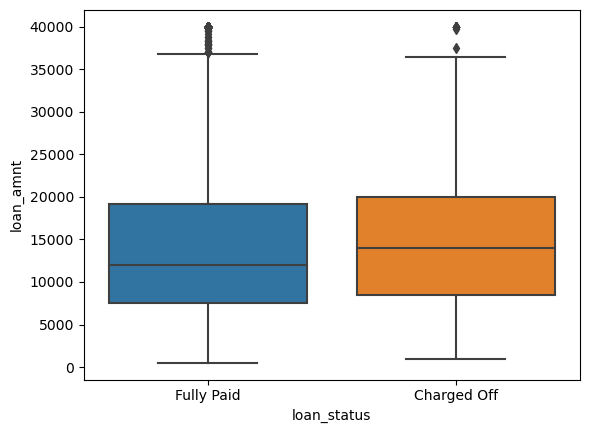

In [8]:
#see here that they are similar, but for charged off a bit higher for loan amount - maybe a larger loan is harder to pay off...
sns.boxplot(x = "loan_status" , y = "loan_amnt" , data=data)

In [9]:
#see the mean of the charged off group is 2k higher for loan amount
data.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [11]:
#checking the unique values for grade / subgrade of loans

data["grade"].unique()

data["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

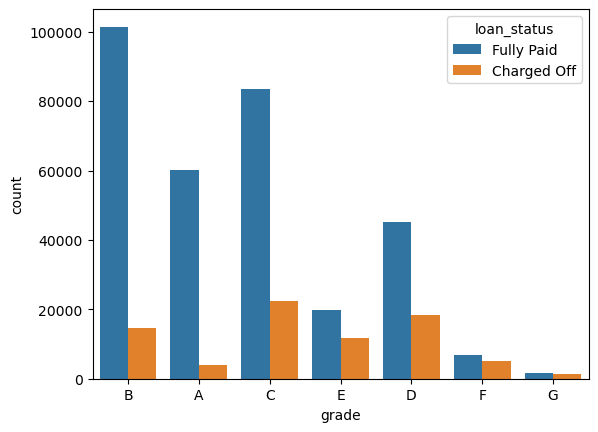

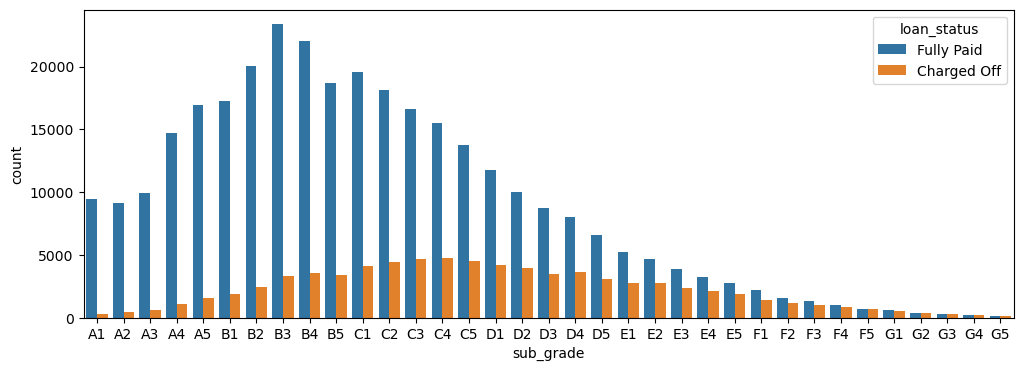

In [12]:
#with these next 2 plots it is easy to see that those with either an A, B or C grade loan are more likely to pay it off than D-G grade loans

sns.countplot(x = "grade" , data = data , hue = "loan_status")
plt.figure(figsize = (12,4))

data_order = sorted(data["sub_grade"].unique())
sns.countplot(x = "sub_grade" , data = data , hue = "loan_status" , order = data_order)

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

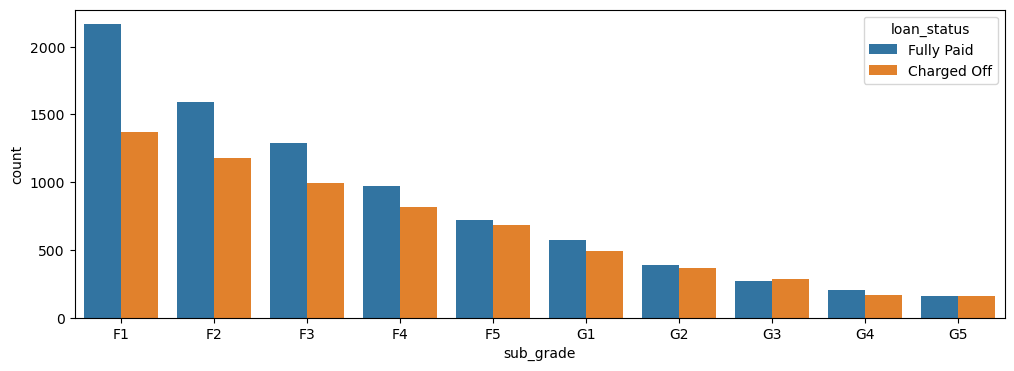

In [14]:
#this makes it much easier to see F and G grade loans and how equal the fully paid and charged off groups are 
only_f_and_g = data[(data["grade"] == "F") | (data["grade"] == "G")]
plt.figure(figsize = (12,4))
data_order = sorted(only_f_and_g["sub_grade"].unique())
sns.countplot(x = "sub_grade" , data = only_f_and_g , hue = "loan_status" , order = data_order)

In [16]:
#creating a new column with a 1 if the loan is fully paid and a 0 if it was charged off
status = pd.get_dummies(data["loan_status"] , drop_first = True)
data["loan_repaid"] = status
data[["loan_repaid" , "loan_status"]].head(7)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
5,1,Fully Paid
6,1,Fully Paid


/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_7497/3438332320.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["loan_repaid"][:-1].sort_values().plot(kind = "bar")


<AxesSubplot: >

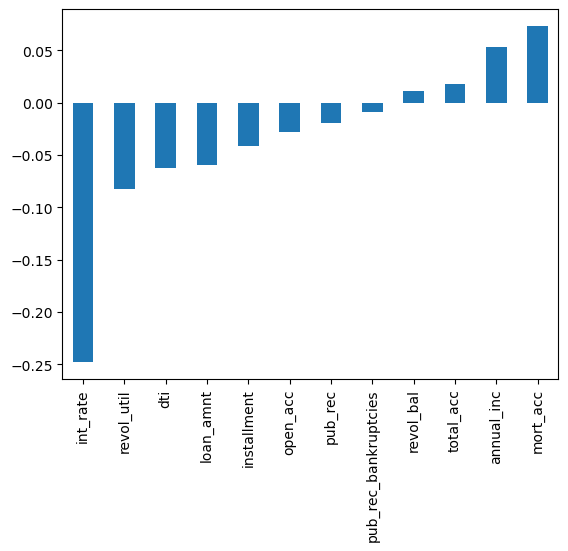

In [17]:
#plot showing that the interest rate has the largest negative correlation of whether or not someone pays back their loan in full

data.corr()["loan_repaid"][:-1].sort_values().plot(kind = "bar")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [23]:
#way to check the % of missing data for each column

(data.isnull().sum() / 396030) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [24]:
#tells me that there is a ton of unique values for this column
data["emp_title"].nunique() 

173105

In [25]:
#this is way too many unique titles to make it a dummy variable column, too...have to drop
data["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [26]:
data.drop("emp_title" , axis = 1, inplace = True)

<AxesSubplot: xlabel='emp_length', ylabel='count'>

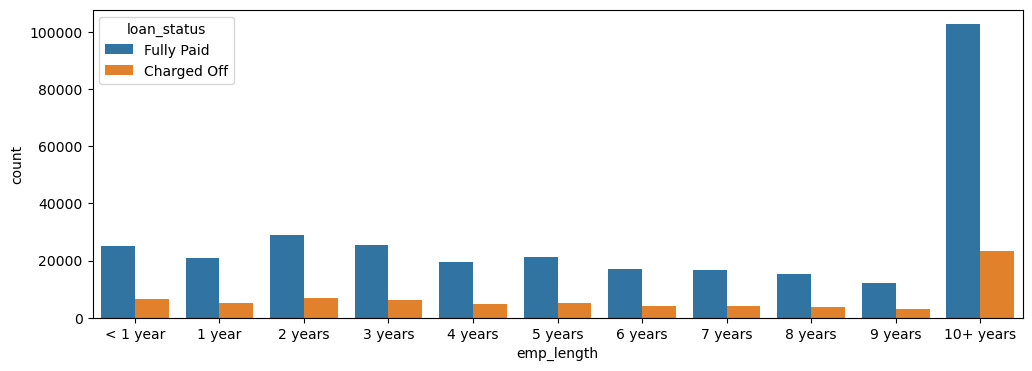

In [33]:
#see that most fully paid loans are people who have been employed for 10+ years

sorted(data["emp_length"].dropna().unique())
emp_length_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
plt.figure(figsize = (12,4))
sns.countplot(x = "emp_length" , data = data , order = emp_length_order , hue = "loan_status")